<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 6.1.1: K-Means by the algorithm

### Australian athletes data set

##### Description
These data were collected in a study of how data on various characteristics of the bloood varied with sport body size and sex of the athlete.

Usage
data(ais)
Format
A data frame with 202 observations on the following 13 variables.

rcc
red blood cell count, in

wcc
while blood cell count, in per liter

hc
hematocrit, percent

hg
hemaglobin concentration, in g per decaliter

ferr
plasma ferritins, ng

bmi
Body mass index, kg

ssf
sum of skin folds

pcBfat
percent Body fat

lbm
lean body mass, kg

ht
height, cm

wt
weight, kg

sex
a factor with levels f m

sport
a factor with levels B_Ball Field Gym Netball Row Swim T_400m T_Sprnt Tennis W_Polo

Details
Do blood hemoglobin concentrations of athletes in endurance-related events differ from those in power-related events?

Source
These data were the basis for the analyses that are reported in Telford and Cunningham (1991).

References
Telford, R.D. and Cunningham, R.B. 1991. Sex, sport and body-size dependency of hematology in highly trained athletes. Medicine and Science in Sports and Exercise 23: 788-794.

**References**

[Data](http://vincentarelbundock.github.io/Rdatasets/csv/DAAG/ais.csv)

[Data Dictionary](http://vincentarelbundock.github.io/Rdatasets/doc/DAAG/ais.html)

In [1]:
# IMPORT LIBRARIES

import numpy as np
import pandas as pd

from sklearn import cluster
from sklearn import metrics
from sklearn.metrics import pairwise_distances

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')

from sklearn import datasets
import seaborn as sns

### 1. Import the data

In [4]:
ais = pd.read_csv('C:/Users/Monica/Desktop/IoD-Folders/MODULE 6/Labs/ais.csv', index_col=0)

In [5]:
# Checking data
ais.head()

,rcc,wcc,hc,hg,ferr,bmi,ssf,pcBfat,lbm,ht,wt,sex,sport
1,3.96,7.5,37.5,12.3,60,20.56,109.1,19.75,63.32,195.9,78.9,f,B_Ball
2,4.41,8.3,38.2,12.7,68,20.67,102.8,21.30,58.55,189.7,74.4,f,B_Ball
3,4.14,5.0,36.4,11.6,21,21.86,104.6,19.88,55.36,177.8,69.1,f,B_Ball
4,4.11,5.3,37.3,12.6,69,21.88,126.4,23.66,57.18,185.0,74.9,f,B_Ball
5,4.45,6.8,41.5,14.0,29,18.96,80.3,17.64,53.20,184.6,64.6,f,B_Ball


In [8]:
ais.tail()

,rcc,wcc,hc,hg,ferr,bmi,ssf,pcBfat,lbm,ht,wt,sex,sport
198,4.90,7.6,45.6,16.0,90,27.56,67.2,11.79,82.0,183.9,93.2,m,W_Polo
199,5.66,8.3,50.2,17.7,38,23.76,56.5,10.05,72.0,183.5,80.0,m,Tennis
200,5.03,6.4,42.7,14.3,122,22.01,47.6,8.51,68.0,183.1,73.8,m,Tennis
201,4.97,8.8,43.0,14.9,233,22.34,60.4,11.50,63.0,178.4,71.1,m,Tennis
202,5.38,6.3,46.0,15.7,32,21.07,34.9,6.26,72.0,190.8,76.7,m,Tennis


### 2. Do some EDA of relationships between features.

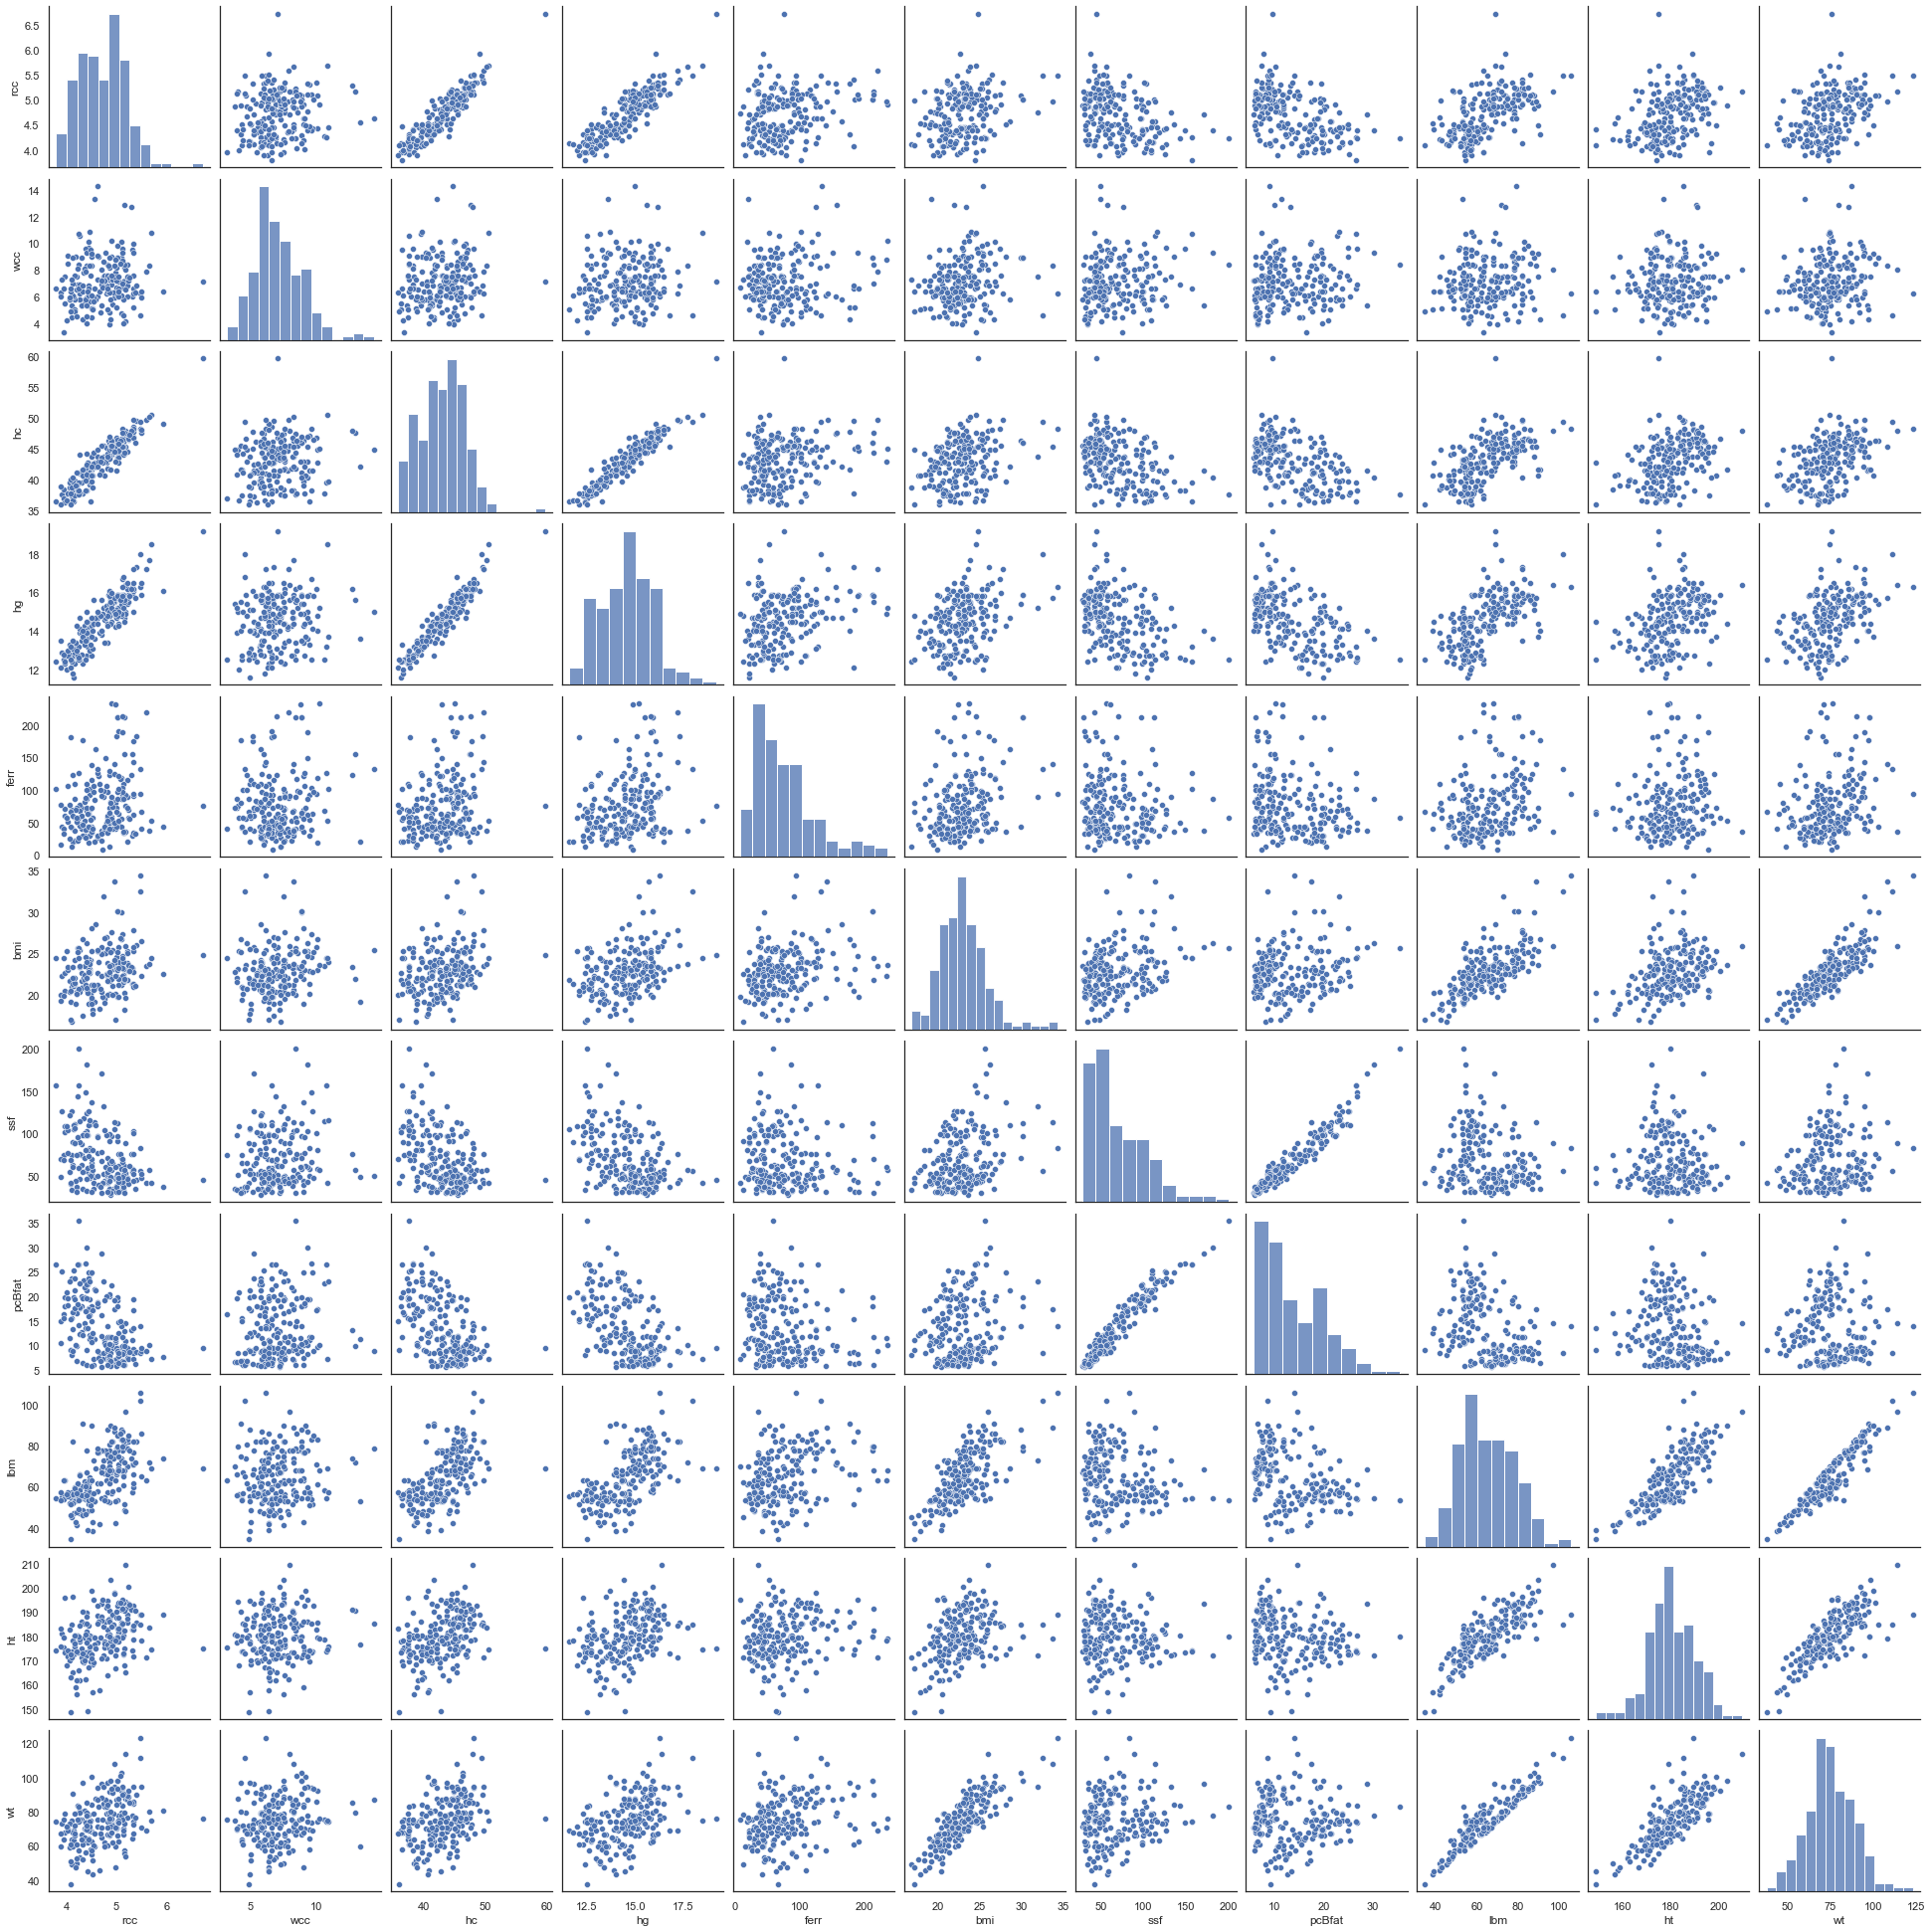

In [18]:
# Plot the Data to see the distributions/relationships
import seaborn as sns

# Plot without the "sex" hue.
sns.pairplot(ais)

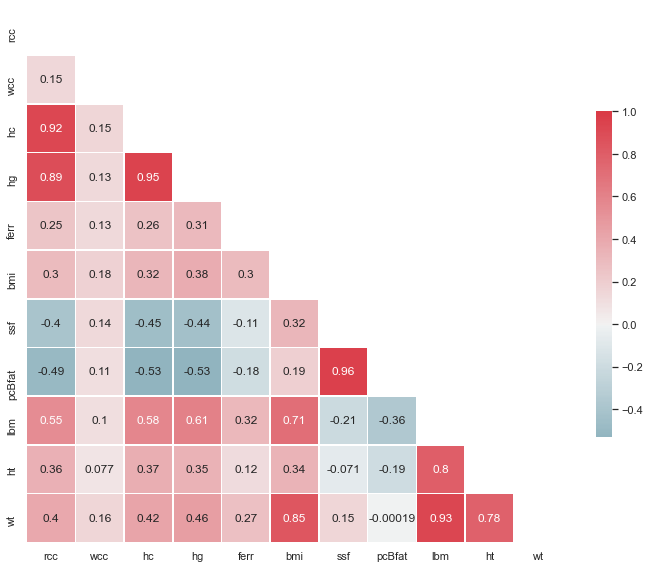

In [17]:
# Heatmap using seaborne to visualise the correlation between the different variables of the dataset. The heatmap is a correlation matrix.
sns.set(style="white")

# Generate a mask for the upper triangle
mask = np.zeros_like(ais.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 12))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(ais.corr(), mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.show();

C:\Users\Monica\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Monica\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Monica\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

ValueError: could not convert string to float: 'f'

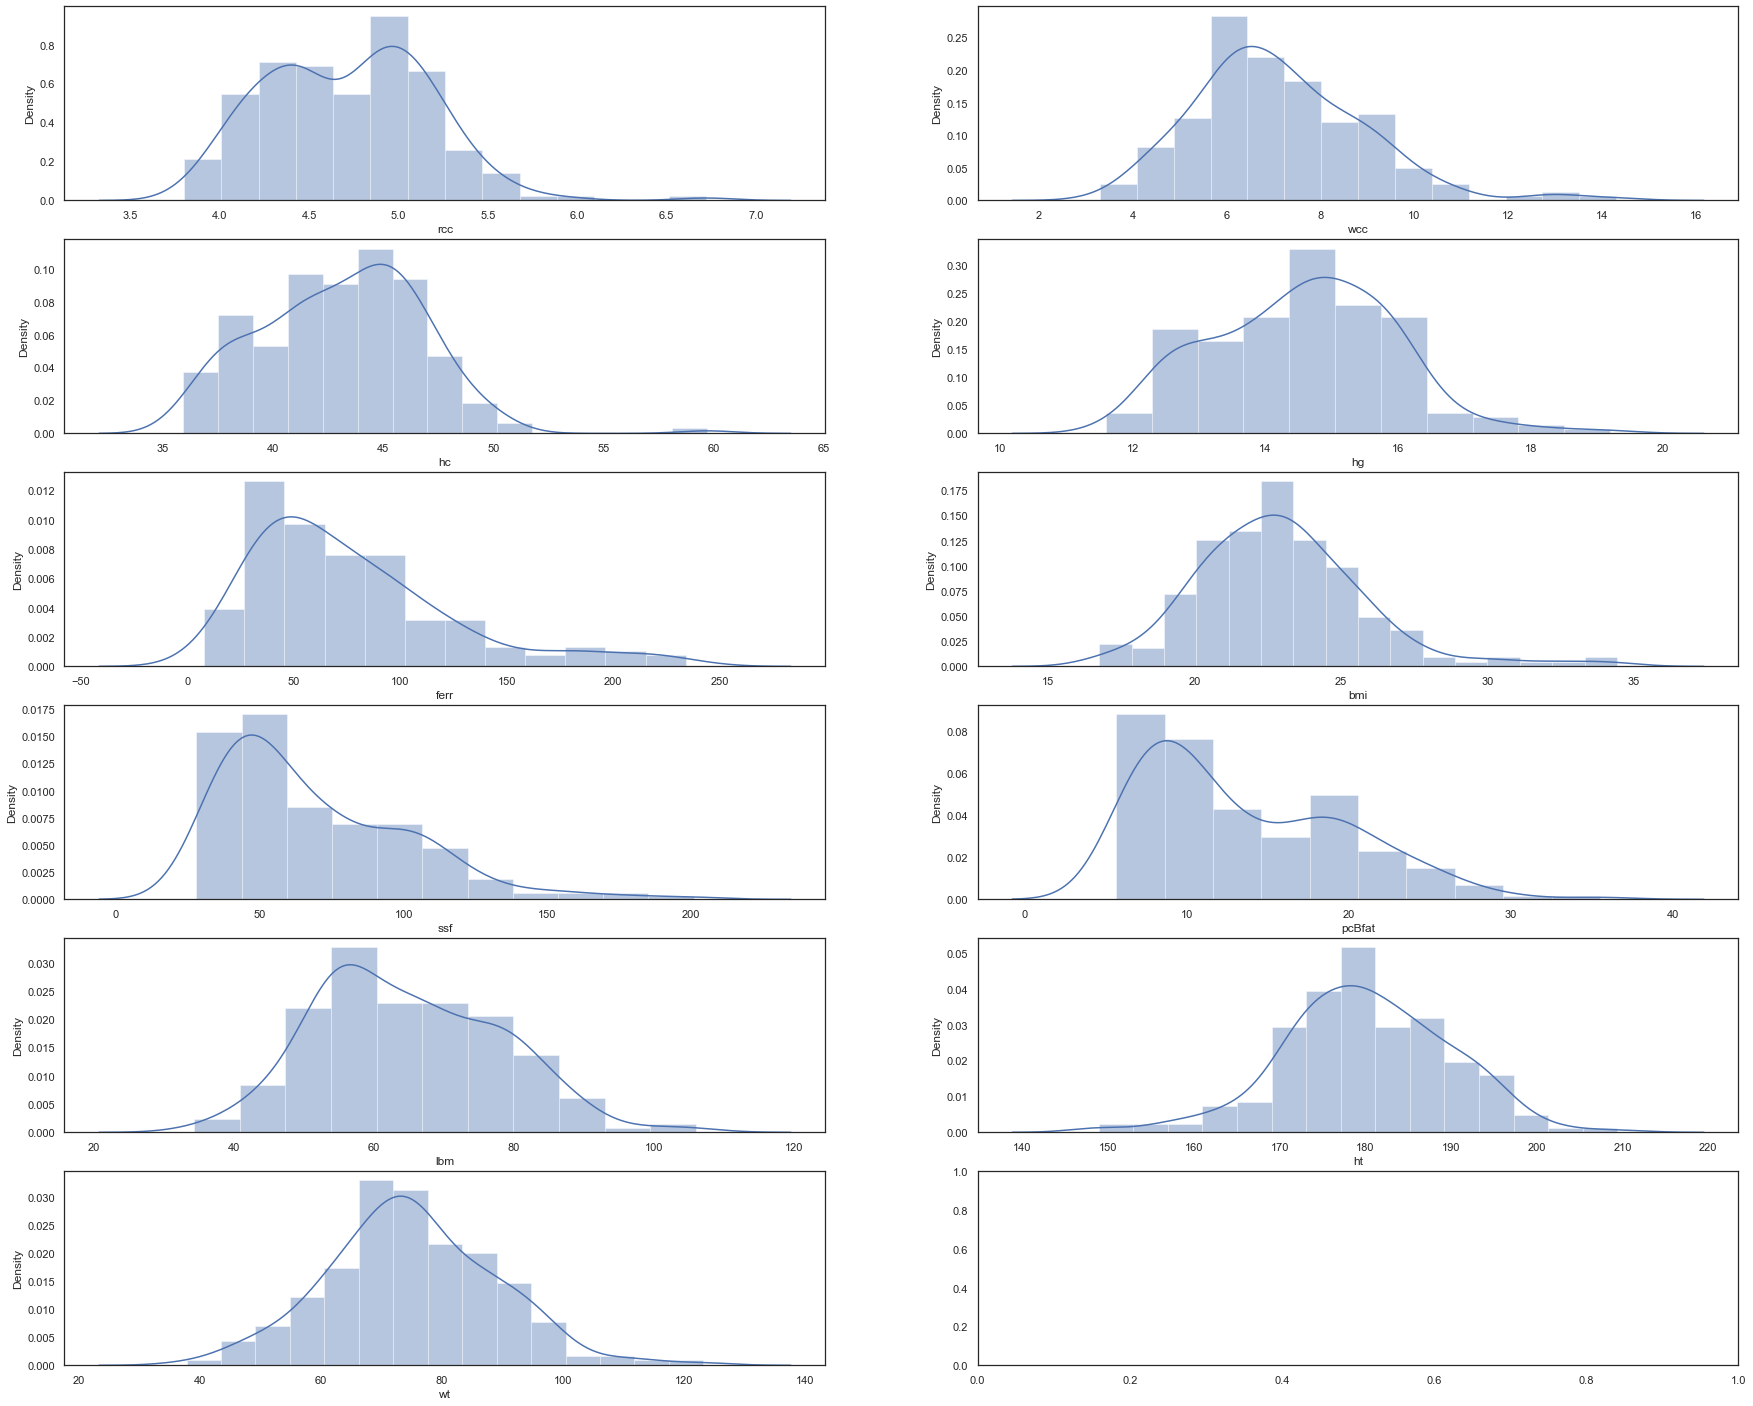

In [16]:
plt.figure(figsize=(30,25))
for i, c in enumerate(ais):
    plt.subplot(6,2, i+1)
    sns.distplot(ais[c])

plt.show()

In [19]:
# Check for nulls: no null values
ais.isnull().sum()

rcc       0
wcc       0
hc        0
hg        0
ferr      0
bmi       0
ssf       0
pcBfat    0
lbm       0
ht        0
wt        0
sex       0
sport     0
dtype: int64

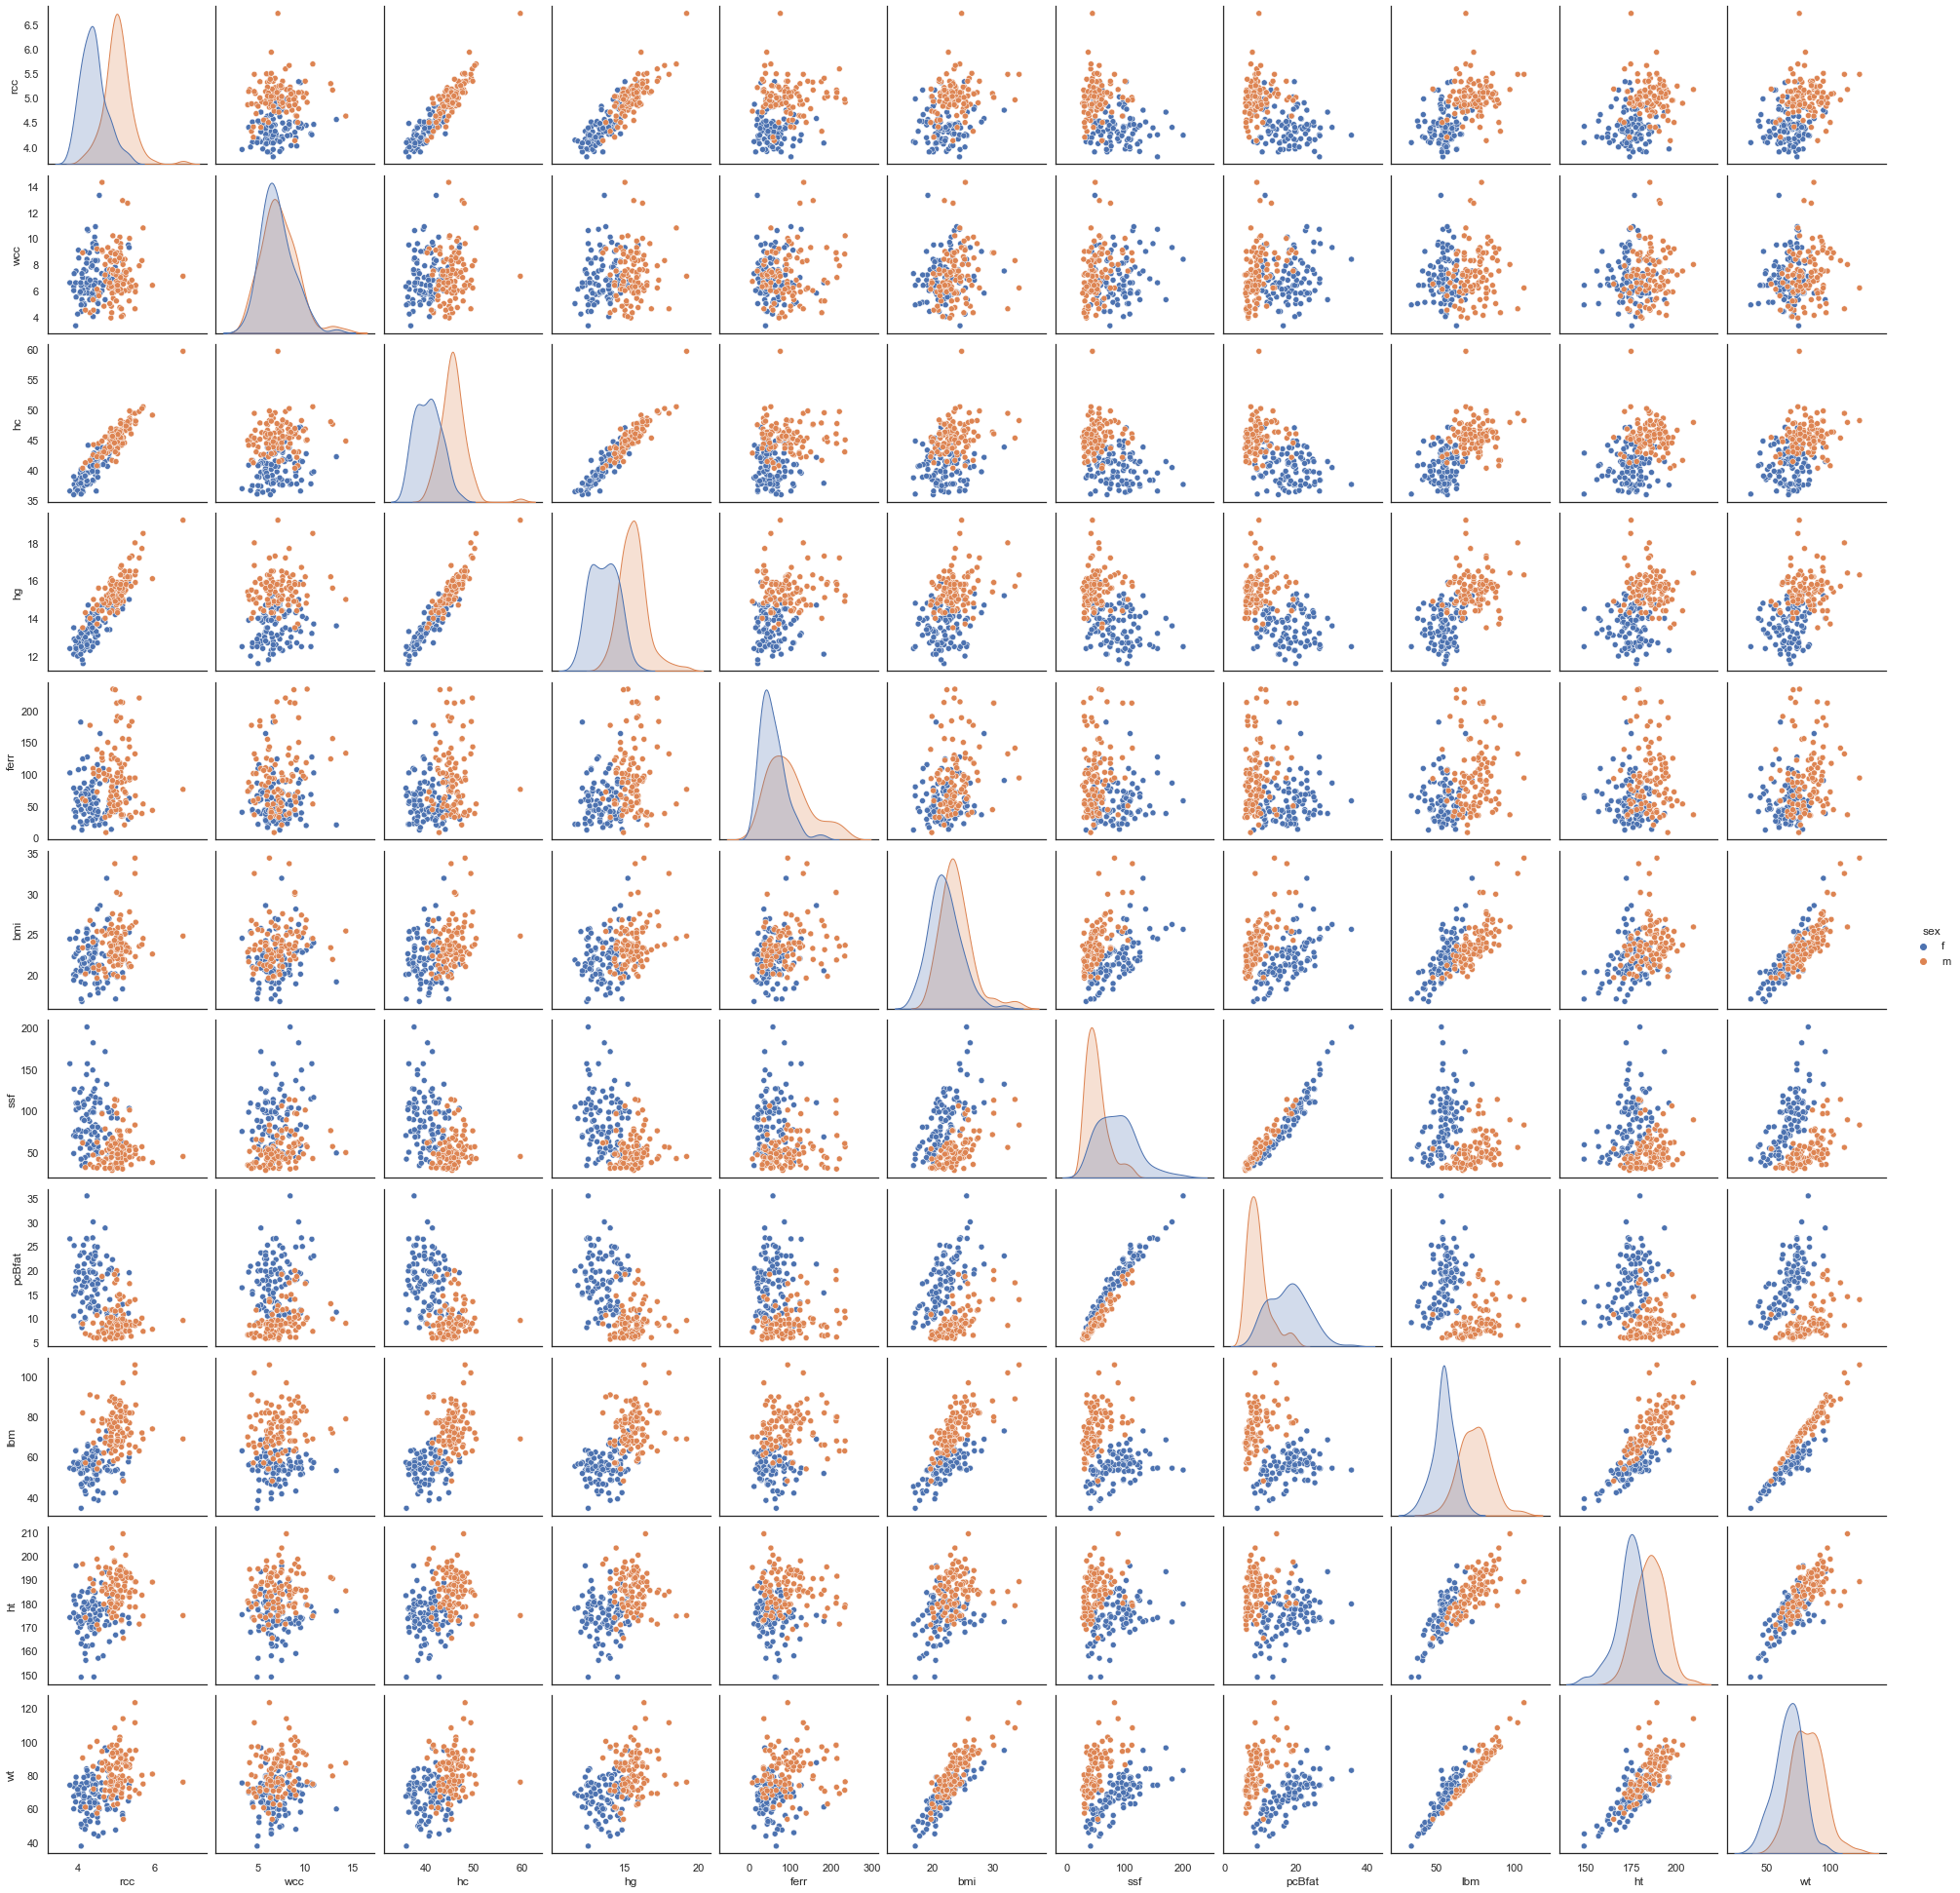

In [20]:
# Look at labels.
sns.pairplot(data=ais, hue='sex')
# Looks like colour blue is deparated from colour ornage for many of the features and both look simirlar en sample numbers 

In [21]:
# Checking how balanced is the dataset lookgin at sex: it is evident both classes are equally distributed
ais['sex'].value_counts()

m    102
f    100
Name: sex, dtype: int64

In [22]:
# Cheching at types: all features are number but 2: sex and sport
ais.dtypes

rcc       float64
wcc       float64
hc        float64
hg        float64
ferr        int64
bmi       float64
ssf       float64
pcBfat    float64
lbm       float64
ht        float64
wt        float64
sex        object
sport      object
dtype: object

### 3. Prepare the data for clustering

1. Remove the `sex`, `sport` column. We will see if the clusters from K-Means end up like the actual sex.
2. Put the features on the same scale.

In [23]:
# drop categorical features (sex, sport)
X = ais.drop(['sex', 'sport'], axis = 1)

In [24]:
# Rescaling numerical features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

In [27]:
X_scaled

array([[-1.66056304,  0.21777075, -1.53030101, ..., -0.11916982,
         1.62671873,  0.2801934 ],
       [-0.67553837,  0.66323597, -1.33872548, ..., -0.48502895,
         0.98822602, -0.04376463],
       [-1.26655317, -1.17430808, -1.83134828, ..., -0.72970203,
        -0.23726805, -0.42531519],
       ...,
       [ 0.68160673, -0.39474394, -0.10716849, ...,  0.23978631,
         0.30854023, -0.08695903],
       [ 0.55027011,  0.94165174, -0.02506469, ..., -0.14371383,
        -0.17547843, -0.28133385],
       [ 1.44773703, -0.45042709,  0.7959733 , ...,  0.54658641,
         1.10150699,  0.12181392]])

### 4. Clustering with K-Means

- Cluster the data to our our target groups.
    - Use sklearn.cluster.KMeans
- We know that there are 2 actual classes. Lets try using 2, 4. Run the clustering algorithm with each of those k values.

In [28]:
from sklearn.cluster import KMeans

k = 2
# 2 Clusters
k_mean2 = KMeans(n_clusters=k)
k_mean2.fit(X_scaled)

KMeans(n_clusters=2)

In [31]:
k_mean2.cluster_centers_

array([[ 0.58857662,  0.469505  ,  0.6483005 ,  0.69771482,  0.74390348,
         1.06496953, -0.13425937, -0.33358526,  1.32633806,  0.9468184 ,
         1.28911268],
       [-0.57952334, -0.22642895, -0.5525194 , -0.63075679, -0.36287766,
        -1.02934324, -0.43738062, -0.20758716, -1.09855943, -1.09857787,
        -1.24928116],
       [-0.82338808, -0.04208397, -0.87251034, -0.8426938 , -0.4061467 ,
         0.07291966,  1.19314656,  1.28737688, -0.54761348, -0.18125992,
        -0.09996787],
       [ 0.83359376, -0.19197321,  0.80991546,  0.79804782,  0.0643323 ,
        -0.18837463, -0.79849352, -0.91008594,  0.29974257,  0.24947091,
        -0.02284658]])

In [30]:
from sklearn.cluster import KMeans

k = 4
# 4 Clusters
k_mean4 = KMeans(n_clusters=k)
k_mean4.fit(X_scaled)

KMeans(n_clusters=4)

In [33]:
# The KMeans algorithm clusters data by trying to separate samples in n groups of equal variance, minimizing a criterion known as the inertia or within-cluster sum-of-squares 
# Inertia makes the assumption that clusters are convex and isotropic, which is not always the case. 
# It responds poorly to elongated clusters, or manifolds with irregular shapes.
k_mean2.inertia_

1048.5806233058452

In [32]:
k_mean4.cluster_centers_

array([[-0.86727363, -0.03589695, -0.92769967, -0.90178686, -0.43471785,
         0.07222368,  1.22327027,  1.30485906, -0.55559297, -0.18692096,
        -0.10229038],
       [ 0.81860441, -0.20273306,  0.79691702,  0.78593617,  0.05755611,
        -0.13815435, -0.79404319, -0.90615029,  0.38317568,  0.33180012,
         0.06298016],
       [-0.54991204, -0.21074743, -0.51471271, -0.59105878, -0.38001976,
        -1.02173718, -0.40306825, -0.16256092, -1.08378937, -1.04456283,
        -1.2183081 ],
       [ 0.56021985,  0.53162125,  0.62616772,  0.68865674,  0.85494133,
         1.16165418, -0.03320341, -0.23699704,  1.30982141,  0.88407307,
         1.31620462]])

In [34]:
k_mean4.inertia_

1049.4495103902186

In [37]:
# To see all features
X

,rcc,wcc,hc,hg,ferr,bmi,ssf,pcBfat,lbm,ht,wt
1,3.96,7.5,37.5,12.3,60,20.56,109.1,19.75,63.32,195.9,78.9
2,4.41,8.3,38.2,12.7,68,20.67,102.8,21.30,58.55,189.7,74.4
3,4.14,5.0,36.4,11.6,21,21.86,104.6,19.88,55.36,177.8,69.1
4,4.11,5.3,37.3,12.6,69,21.88,126.4,23.66,57.18,185.0,74.9
5,4.45,6.8,41.5,14.0,29,18.96,80.3,17.64,53.20,184.6,64.6
...,...,...,...,...,...,...,...,...,...,...,...
198,4.90,7.6,45.6,16.0,90,27.56,67.2,11.79,82.00,183.9,93.2
199,5.66,8.3,50.2,17.7,38,23.76,56.5,10.05,72.00,183.5,80.0
200,5.03,6.4,42.7,14.3,122,22.01,47.6,8.51,68.00,183.1,73.8
201,4.97,8.8,43.0,14.9,233,22.34,60.4,11.50,63.00,178.4,71.1


In [39]:
# Slicing 2 type blood cells counts (reds=rcc and whites=wcc)
X[['rcc', 'wcc']]

,rcc,wcc
1,3.96,7.5
2,4.41,8.3
3,4.14,5.0
4,4.11,5.3
5,4.45,6.8
...,...,...
198,4.90,7.6
199,5.66,8.3
200,5.03,6.4
201,4.97,8.8


In [41]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
rcc,202.0,4.718614,0.457976,3.80,4.3725,4.755,5.030,6.72
wcc,202.0,7.108911,1.800337,3.30,5.9000,6.850,8.275,14.30
hc,202.0,43.091584,3.662989,35.90,40.6000,43.500,45.575,59.70
hg,202.0,14.566337,1.362451,11.60,13.5000,14.700,15.575,19.20
ferr,202.0,76.876238,47.501239,8.00,41.2500,65.500,97.000,234.00
bmi,202.0,22.955891,2.863933,16.75,21.0825,22.720,24.465,34.42
ssf,202.0,69.021782,32.565333,28.00,43.8500,58.600,90.350,200.80
pcBfat,202.0,13.507426,6.189826,5.63,8.5450,11.650,18.080,35.52
lbm,202.0,64.873713,13.070197,34.36,54.6675,63.035,74.750,106.00
ht,202.0,180.103960,9.734494,148.90,174.0000,179.700,186.175,209.40


In [45]:
# Testing X
test = X[['rcc', 'wcc']]
test_scaled = scaler.fit_transform(test)

k_mean2 = KMeans(n_clusters=k)
k_mean2.fit(test_scaled)
k_mean2.labels_
k_mean2.inertia_

132.57741751328726

### 5. Get the labels for the models

In [35]:
# Labels for two clusters
labels_2 = k_mean2.labels_
print(labels_2)

[2 2 2 2 1 1 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 1 2 2 2 2 2 2 1 2
 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 1 2 2 1 2 1 1 2 2 1 1 1 1 1 1 3 2 2 2 2 3
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 3 3 3 3 3 3 3 0 3 0 3
 3 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 3 0 0 0 0 0 3 0 3 3 3 1 3 3 3 0 0 3 3
 3 3 3 3 1 3 1 3 3 3 3 0 3 0 0 3 0 3 3 3 3 3 3 3 3 3 3 0 0 0 0 3 3 0 0 0 0
 0 0 3 0 0 3 0 3 0 0 0 3 0 3 3 3 3]


In [36]:
# Labels for four clusters
labels_4 = k_mean4.labels_
print(labels_4)

[0 0 0 0 2 2 0 0 0 2 0 0 0 0 0 0 0 2 0 0 0 0 0 2 0 2 0 0 2 0 0 0 0 0 0 2 0
 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 2 0 0 2 0 2 2 0 0 2 2 2 2 2 2 1 3 0 0 0 1
 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 3 1 3 1
 1 3 3 3 1 3 3 3 3 2 3 3 1 3 3 1 3 1 1 3 1 3 3 3 1 3 1 1 1 2 1 1 1 3 3 1 1
 1 1 1 1 2 1 2 1 1 1 1 3 1 3 3 1 3 1 1 1 1 1 1 1 1 1 1 3 3 3 3 1 1 3 3 3 3
 3 3 1 3 3 1 3 1 3 3 3 1 3 1 1 1 1]


### 6. Elbow Method For Optimal k

For each k value, we will initialise k-means and use the inertia attribute to identify the sum of squared distances of samples to the nearest cluster centre. As k increases, the sum of squared distance tends to zero. 

In [46]:
# ANSWER
Sum_of_squared_distances = []
K = range(1,15)

for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X_scaled)
    Sum_of_squared_distances.append(km.inertia_)

C:\Users\Monica\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Below is a plot of sum of squared distances for k in the range specified above. If the plot looks like an arm, then the elbow on the arm is optimal k.

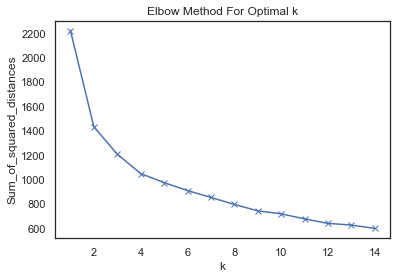

In [48]:
# ANSWER
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

### 7. Plot `ht` vs. `wt` using the clusters from each model.

- Plot ht, wt using hue sex
- Plot ht, wt using hue label

Each time, compare to the actual species classification.

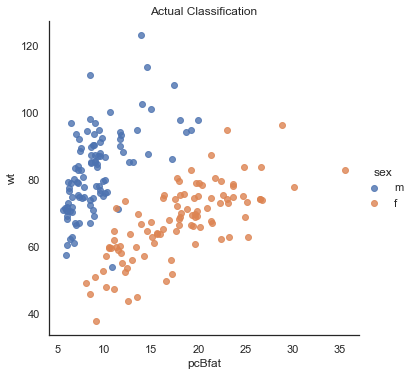

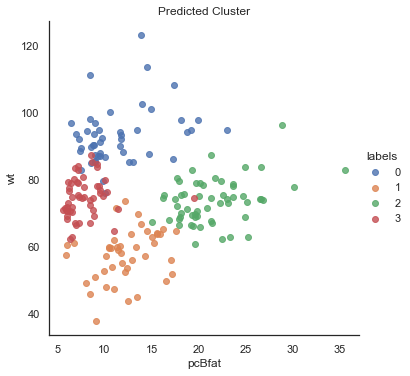

In [67]:
# ANSWER
ais_labels = ais
ais_labels['labels'] = labels_2

sns.lmplot(x='pcBfat', y='wt', data=ais_labels, hue='sex', 
           hue_order=['m', 'f'], fit_reg=False)

plt.title('Actual Classification')

sns.lmplot(x='pcBfat', y='wt', data=ais_labels, hue='labels', fit_reg=False)
plt.title('Predicted Cluster')

plt.show()

[[ 7.93826923 74.80961538]
 [21.04362069 72.80862069]
 [11.82595238 56.57142857]
 [11.9698     93.252     ]]


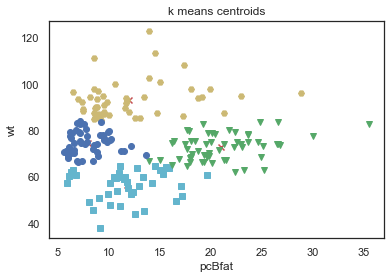

In [68]:
x1 = np.array(ais['pcBfat'])
x2 = np.array(ais['wt'])

# create new plot and data
plt.plot()
X = np.array(list(zip(x1, x2))).reshape(len(x1), 2)
colors = ['b', 'g', 'c', 'y']
markers = ['o', 'v', 's', 'H']

# KMeans algorithm 
K = 4
kmeans_model = KMeans(n_clusters=K).fit(X)

print(kmeans_model.cluster_centers_)
centers = np.array(kmeans_model.cluster_centers_)

plt.plot()
plt.title('k means centroids')
plt.xlabel('pcBfat')
plt.ylabel('wt')

for i, l in enumerate(kmeans_model.labels_):
    plt.plot(x1[i], x2[i], color=colors[l], marker=markers[l],ls='None')

plt.scatter(centers[:,0], centers[:,1], marker="x", color='r')
plt.show()



---



---



> > > > > > > > > © 2019 Institute of Data


---



---



